The Dynamics of the bicycle model can be devided to two categories: the first one is the dynamic of the moving bicycle in the longitudental direction , the other one is the dynamics in the lateral direction 

First : the longtidental direction 

we need to determine the number of forces that affect bicycle movment 

assuming the model does climb over inclined surface with an angle $\alpha$ 


![LongitudentalModel](LongitudentalModel.png)

\begin{align}
    m\ddot{x} &= F_{xf} + F_{xr} - F_{aero} - R_{xf} - R_{xr} - mg\sin{\alpha} 
\end{align}

where $F_{xf} \ and\ F_{xr}$ represent the moving forces for the car to climb the inclined surface from the from and the rear tires 

on top of that $F_{aero}$ is the forces to overcome the aurflow while moving 

The forces $R_{xf}\ and\ R_{xr}$ are the forces genrated from the friction of the road 

finally the weight of the car also causing a resitance for the car movment

to simplify this equation :

1-The total longitdinal forces : 

\begin{align}
   F_{x} = F_{xf} + F_{xr}
\end{align}

2- Total Rolling Resistance 
\begin{align}
   R_{x} = R_{xf} + R_{xr}
\end{align}

Then simplified equation for the car accelration will be as follows: 

\begin{align}
    m\ddot{x} &= F_{x} - F_{aero} - R_{x} - mg\sin{\alpha}
\end{align}

Therefore the total resistance forces: 


\begin{align}
    F_{load} &= F_{aero} + R_{x} + mg\sin{\alpha}
\end{align}

The aerod dynamic forces is calcuated as follow : 

\begin{align}
    F_{aero} &= \frac{1}{2} C_a \rho A \dot{x}^2 = c_a \dot{x}^2
\end{align}

Power train Modelling :

![modling](modling.png)  

First of all the longtitdental velocity is equal : 


\begin{align}
     \dot{x} &= r_{eff} {\omega_{wheel}}
\end{align}

where $r_{eff}$ is the tire effective radius for the car and ${\omega_{wheel}}$ 

then the rotational coupling can be defined as the the ratio betwwen the angular velocity of the wheels and angular velocity of the engine 

\begin{align}
     {\omega_{wheel}} &= GR {\omega_{wheel}}
\end{align}

where GR is the combined gear ratios 

therefore, 
\begin{align}
     \ddot{x} &= r_{eff} GR {\dot\omega_{wheel}}
\end{align}


The power flow for the powertrain:


![torque](torque.png)

The torque of the wheels:

\begin{align}
     I_{\omega}{\omega_{wheel}} &= T_{wheel} - r_{eff}F_x\\
     T_{wheel} &= I_{\omega}{\omega_{wheel}} + r_{eff}F_x
\end{align}

The tranmission : 
\begin{align}
     I_t{\dot\omega_{t}} &= T_{t} - (GR)T_{wheel}\\
     I_t{\dot\omega_{t}} &= T_t + GR(I_{\omega}{\dot\omega_{w}} + r_{eff}F_x)
\end{align}

Torque converter: 
\begin{align}
     {\omega_{t}} &= {\omega_{e}}\\
     T_t &= (I_t + I_{\omega}GR^2){\dot\omega_{wheel}} + GRr_{eff}F_x
\end{align}

Eninge: 
\begin{align}
     I_e {\dot\omega_{e}} &= T_{Enigne} - T_t \\
     I_e {\dot\omega_{e}} &= T_{Enigne} - (I_t + I_{\omega}GR^2){\dot\omega_{wheel}} + GRr_{eff}F_x
\end{align}

The tire forces in terms of inertia  and load forces: 
\begin{align}
     F_x &= m\ddot{x} + F_{Load} = mr_{eff}GR{\dot\omega_{e} + F_{load}} \\
     (I_e + I_t + I_{\omega}GR^2 + m(GR)^2 r^2_{eff}){\dot\omega_{e}} &= T_{Engine} - (GR)(r_{eff}F_{Load})
\end{align}

Therefore, 

\begin{align}
    J_e \dot{\omega}_e &= T_e - (GR)(r_{eff} F_{load}
\end{align}

Moment of Inertia for the wheels -------> $I_w$

angular velocity of the wheels -------> ${\omega_{w}}$

angular accelration of the wheels ---> ${\dot\omega_{w}}$

Torque of the wheels-------> $T_{wheel}$

Tire effective radaius -------> $r_{eff}$

Traction forces -------> $F_x$

Moment of inertia of the transmistion-------> $I_t$

angular velocity of the tranmission -----> ${\omega_{t}}$

angular accleration og the tranmission -> ${\dot\omega_{t}}$

Tranmision torque -------> $T_t$

angular velocity of the engine is -------> ${\omega_e}$


The input to the model is a throttle percentage $x_\theta \in [0,1]$ which provides torque to the engine and subsequently accelerates the vehicle for forward motion. 

The dynamic equations consist of many stages to convert throttle inputs to wheel speed (engine -> torque converter -> transmission -> wheel). These stages are bundled together in a single inertia term $J_e$ which is used in the following combined engine dynamic equations.

\begin{align}
    J_e \dot{\omega}_e &= T_e - (GR)(r_{eff} F_{load}) \\ m\ddot{x} &= F_x - F_{load}
\end{align}


Where $T_e$ is the engine torque, $GR$ is the gear ratio, $r_{eff}$ is the effective radius, $m$ is the vehicle mass, $x$ is the vehicle position, $F_x$ is the tire force, and $F_{load}$ is the total load force. 

The engine torque is computed from the throttle input and the engine angular velocity $\omega_e$ using a simplified quadratic model. 

\begin{align}
    T_e = x_{\theta}(a_0 + a_1 \omega_e + a_2 \omega_e^2)
\end{align}

The load forces consist of aerodynamic drag $F_{aero}$, rolling friction $R_x$, and gravitational force $F_g$ from an incline at angle $\alpha$. The aerodynamic drag is a quadratic model and the friction is a linear model.

\begin{align}
    F_{load} &= F_{aero} + R_x + F_g \\
    F_{aero} &= \frac{1}{2} C_a \rho A \dot{x}^2 = c_a \dot{x}^2\\
    R_x &= N(\hat{c}_{r,0} + \hat{c}_{r,1}|\dot{x}| + \hat{c}_{r,2}\dot{x}^2) \approx c_{r,1} \dot{x}\\
    F_g &= mg\sin{\alpha}
\end{align}

Note that the absolute value is ignored for friction since the model is used for only forward motion ($$\dot{x} \ge 0$). 
 
The tire force is computed using the engine speed and wheel slip equations.

\begin{align}
    \omega_w &= (GR)\omega_e \\
    s &= \frac{\omega_w r_e - \dot{x}}{\dot{x}}\\
    F_x &= \left\{\begin{array}{lr}
        cs, &  |s| < 1\\
        F_{max}, & \text{otherwise}
        \end{array}\right\} \end{align}

Where $\omega_w$ is the wheel angular velocity and $s$ is the slip ratio. 

We setup the longitudinal model inside a Python class below. The vehicle begins with an initial velocity of 5 m/s and engine speed of 100 rad/s. All the relevant parameters are defined and like the bicycle model, a sampling time of 10ms is used for numerical integration.

In [62]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import atan2
class Vehicle():
    def __init__(self):
 
        # ==================================
        #  Parameters
        # ==================================
    
        #Throttle to engine torque
        self.a_0 = 400
        self.a_1 = 0.1
        self.a_2 = -0.0002
        
        # Gear ratio, effective radius, mass + inertia
        self.GR = 0.35
        self.r_e = 0.3
        self.J_e = 10
        self.m = 2000
        self.g = 9.81
        
        # Aerodynamic and friction coefficients
        self.c_a = 1.36
        self.c_r1 = 0.01
        
        # Tire force 
        self.c = 10000
        self.F_max = 10000
        
        # State variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0
        
        self.sample_time = 0.01
        
    def reset(self):
        # reset state variables
        self.x = 0
        self.v = 5
        self.a = 0
        self.w_e = 100
        self.w_e_dot = 0

Implement the combined engine dynamic equations along with the force equations in the cell below. The function $\textit{step}$ takes the throttle $x_\theta$ and incline angle $\alpha$ as inputs and performs numerical integration over one timestep to update the state variables. Hint: Integrate to find the current position, velocity, and engine speed first, then propagate those values into the set of equations.

In [63]:
class Vehicle(Vehicle):
    def step(self, throttle, alpha):
        # ==================================
        #  Implement vehicle model here
        # ==================================
        T_e = throttle * (self.a_0 + self.a_1*self.w_e + self.a_2*self.w_e**2)
        F_areo = self.c_a * self.v**2
        R_x = self.c_r1 * self.v
        F_g = self.m * self.g * np.sin(alpha)
        F_load = F_areo + R_x + F_g
        #torque equation (angular acceleration)
        self.w_e_dot = (T_e - self.GR*self.r_e*F_load) / self.J_e
        
        w_w = self.GR * self.w_e
        s = (w_w*self.r_e - self.v) / self.v
        if abs(s) < 1:
            F_x = self.c * s
        else:
            F_x = self.F_max
        #force equation (acceleration) 
        self.a = (F_x - F_load) / self.m
            
        #update equations
        self.w_e += self.w_e_dot * self.sample_time
        #since v = a*t
        self.v += self.a * self.sample_time
        #since x = v*t - (1/2)*a*t^2
        self.x += (self.v * self.sample_time) - (0.5 * self.a * self.sample_time**2) 

Using the model, you can send constant throttle inputs to the vehicle in the cell below. You will observe that the velocity converges to a fixed value based on the throttle input due to the aerodynamic drag and tire force limit. A similar velocity profile can be seen by setting a negative incline angle $\alpha$. In this case, gravity accelerates the vehicle to a terminal velocity where it is balanced by the drag force.

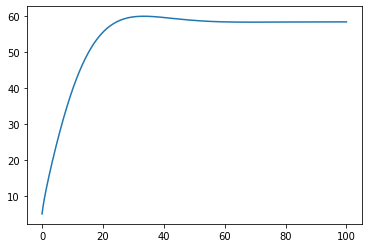

In [64]:
sample_time = 0.01
time_end = 100
model = Vehicle()

t_data = np.arange(0,time_end,sample_time)
v_data = np.zeros_like(t_data)

# throttle percentage between 0 and 1
throttle = 0.2

# incline angle (in radians)
alpha = -0.2

for i in range(t_data.shape[0]):
    v_data[i] = model.v
    model.step(throttle, alpha)
    
plt.plot(t_data, v_data)
plt.show()

We will now drive the vehicle over a slope as shown in the diagram below.

![ramp](ramp.png)

To climb the slope, a trapezoidal throttle input is provided for the next 20 seconds as shown in the figure below. 

![throttle](throttle.png)

The vehicle begins at 20% throttle and gradually increases to 50% throttle. This is maintained for 10 seconds as the vehicle climbs the steeper slope. Afterwards, the vehicle reduces the throttle to 0.

In the cell below, implement the ramp angle profile $\alpha (x)$ and throttle 
profile $ x_\theta (t) $ and step them through the vehicle dynamics. 
The vehicle position $x(t)$ 
is saved in the array $\textit{x\_data}$. This will be used to grade your solution.


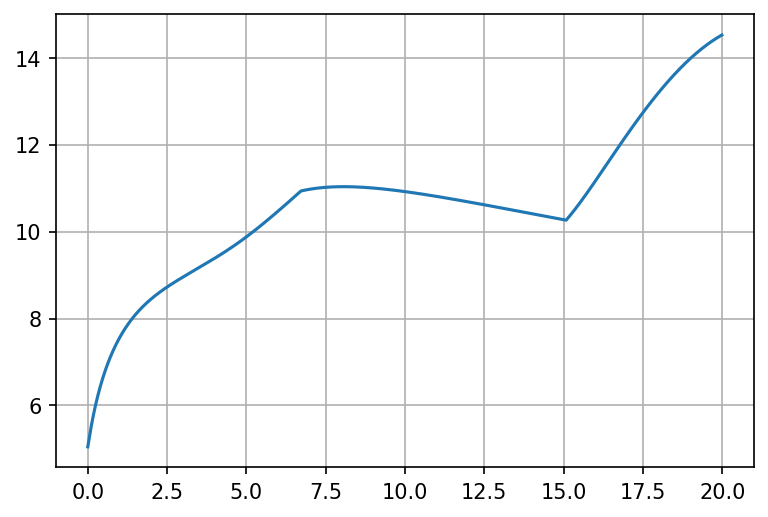

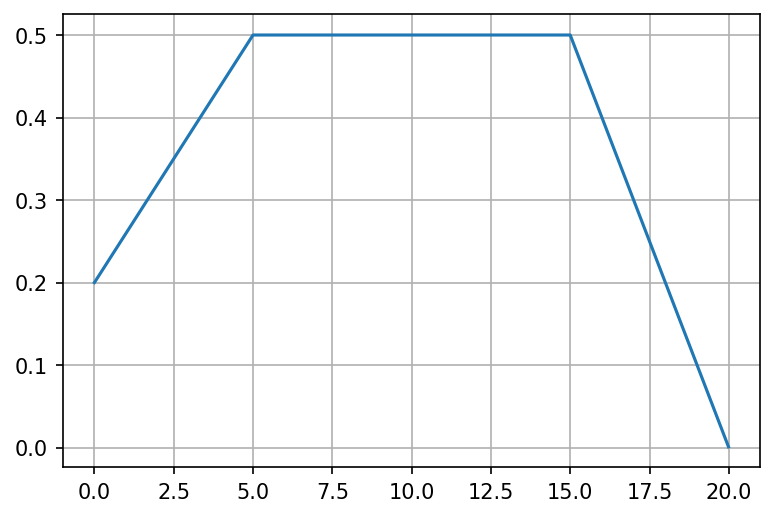

In [65]:
time_end = 20
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_e_data = np.zeros_like(t_data)

# reset the states
model.reset()

# ==================================
#  Learner solution begins here
# ==================================
def angle(i, alpha, x):
    if x < 60:
        alpha[i] = np.arctan(3/60)
    elif x < 150:
        alpha[i] = np.arctan(9/90)
    else:
        alpha[i] = 0

throttle = np.zeros_like(t_data)
alpha = np.zeros_like(t_data)

#throttle depends on time and alpha depends on distance travelled (model.x)
for i in range(t_data.shape[0]):
    if t_data[i] < 5:
        throttle[i] = 0.2 + ((0.5 - 0.2)/5)*t_data[i]
        angle(i, alpha, model.x)
    elif t_data[i] < 15:
        throttle[i] = 0.5
        angle(i, alpha, model.x)
    else:
        throttle[i] = ((0 - 0.5)/(20 - 15))*(t_data[i] - 20)
        angle(i, alpha, model.x)
    
    #call the step function and update x_data array
    model.step(throttle[i], alpha[i])
    x_data[i] = model.x
    v_data[i] = model.v
    w_e_data[i] = model.w_e
# ==================================
#  Learner solution ends here
# ==================================

# Plot x vs t for visualization
plt.gcf().set_dpi(150)
plt.plot(t_data, v_data)
plt.grid()
plt.show()

plt.gcf().set_dpi(150)
plt.plot(t_data , throttle)
plt.grid()

# Plot x vs t for visualization

If you have implemented the vehicle model and inputs correctly, you should see that the vehicle crosses the ramp at ~15s where the throttle input begins to decrease.

The cell below will save the time and vehicle inputs as text file named $\textit{xdata.txt}$. To locate the file, change the end of your web directory to $\textit{/notebooks/Course\_1\_Module\_4/xdata.txt}$

Once you are there, you can download the file and submit to the Coursera grader to complete this assessment.

In [66]:
data = np.vstack([t_data, x_data]).T
np.savetxt('xdata.txt', data, delimiter=', ')